## CS/INFO 5304 Assignment 1: Data Preparation <br />

In [181]:
def format_plot(ax, xlab = "", ylab = "", zlab = "", title = "", legend = False, xticks = None, yticks = None,
                xticks_labels = None, xticks_rotation = "horizontal", y_label_as_title = False, pads = (2, 2)):
    ax.set_xlabel(xlab,  fontsize = 14)
    ax.set_ylabel(ylab,  fontsize = 14)
    
    if zlab != "":
        ax.set_zlabel(zlab, fontsize = 14)
        
    ax.set_title(title,  fontsize = 16, fontweight = "bold", pad = pads[0])
    
    if y_label_as_title:
        ax.set_ylabel(ylab,  fontsize = 16, fontweight = "bold", labelpad = pads[1])
        
    if legend:
        ax.legend(fontsize = 14)
    
    if xticks is not None:
        ax.set_xticks(xticks)
    if xticks_labels is not None:
        ax.set_xticklabels(xticks_labels, rotation = xticks_rotation, fontsize = 8)
    
    if yticks is not None:
        ax.set_yticks(yticks)

def custom_box_plot(ax, data):
    c, fc = "navy", "lightblue" 
    bp0 = ax.boxplot(data, widths = 1.5, vert = False, patch_artist = True, 
                     capprops = dict(color = c, linewidth = 6), 
                     whiskerprops = dict(color = c, linewidth = 4),
                     medianprops = dict(color = c, linewidth = 3), 
                     flierprops = dict(color = c, markersize = 15,
                     markerfacecolor = fc, markeredgewidth = 3, markeredgecolor = c))

    for box in bp0['boxes']:
        box.set(color = c, linewidth = 4)
        box.set(facecolor = fc)
        box.set()    

## Question 3: Outlier Detection (10 points)

In [182]:
import pandas as pd
import matplotlib.pyplot as plt

book_df = pd.read_csv("data/p3/prog_book.csv")

book_df["Reviews"] = book_df["Reviews"].apply(lambda x: int(x.replace(",", "")))
book_df.head()

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,3829,The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,1406,"The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647
3,3.97,1658,Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529
4,4.06,1325,How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706


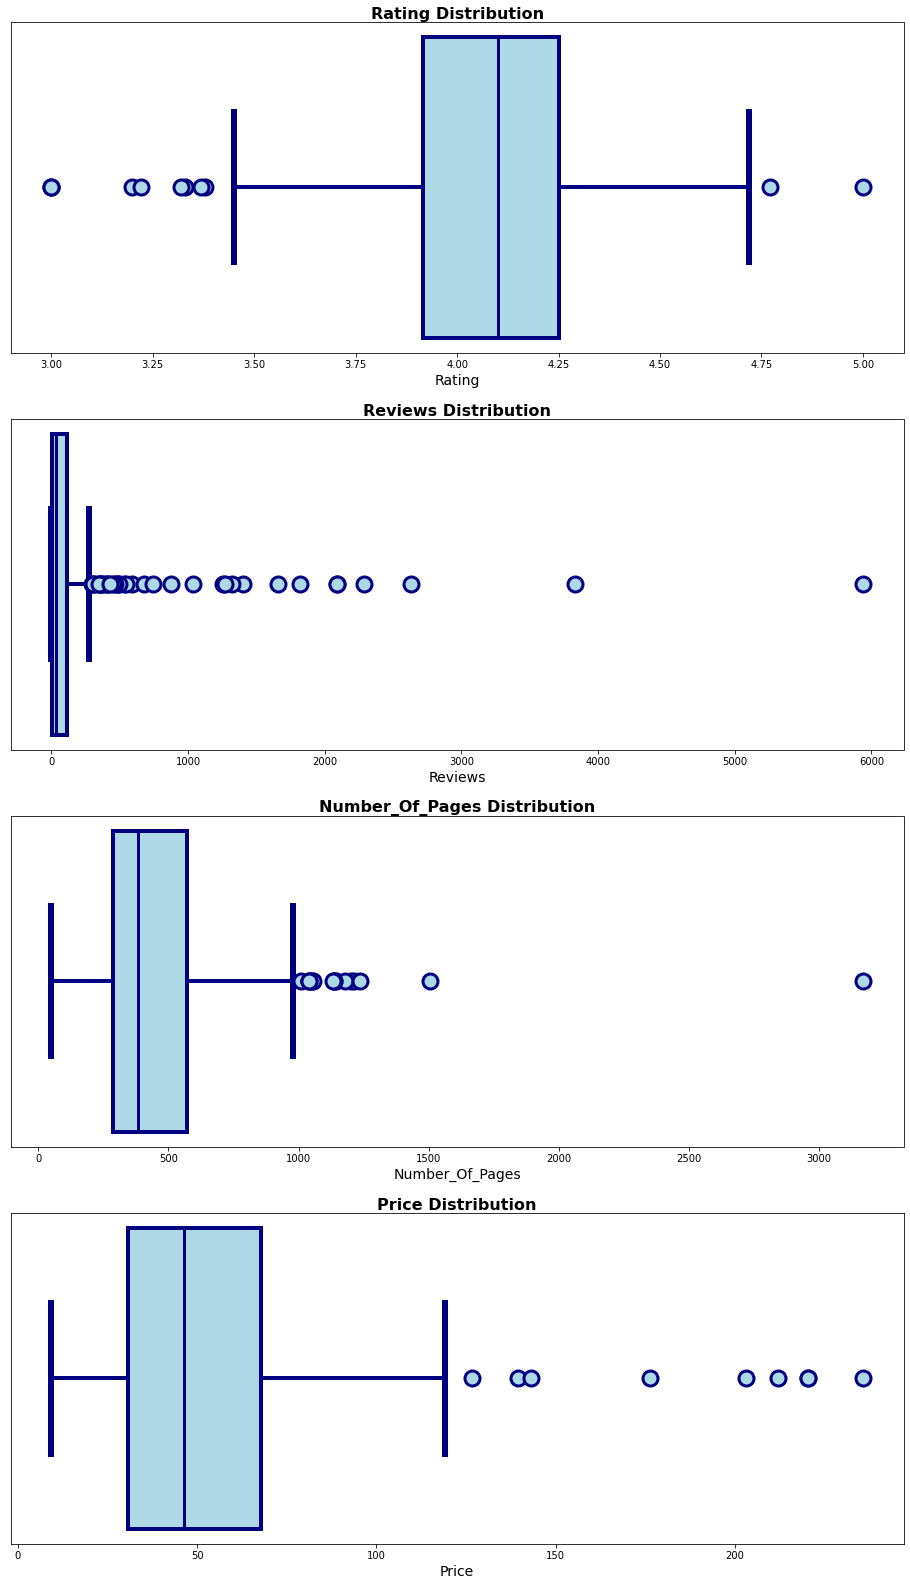

In [183]:
num_features = ["Rating", "Reviews", "Number_Of_Pages", "Price"]

fig, ax = plt.subplots(len(num_features), 1, figsize = (16, 28))

for i, feature in enumerate(num_features):
    custom_box_plot(ax[i], book_df[feature])
    format_plot(ax[i], xlab = feature, ylab = "", yticks=[], 
                title = feature + " Distribution")

plt.show() 

#### Task 2: Multivariate Outlier detection (6 points)

Your first task is to perform a bivariate analysis on all possible pairs of the above features and identify any outliers. The output should be all the DBSCAN plots and the outlier data row(index&value) for each combination.


In [184]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

book_df["Type"] = book_df["Type"].astype('category').cat.codes
book_df = book_df.drop(columns = ['Book_title', 'Description'])

scaler = StandardScaler()
book_df[num_features] = scaler.fit_transform(book_df[num_features])

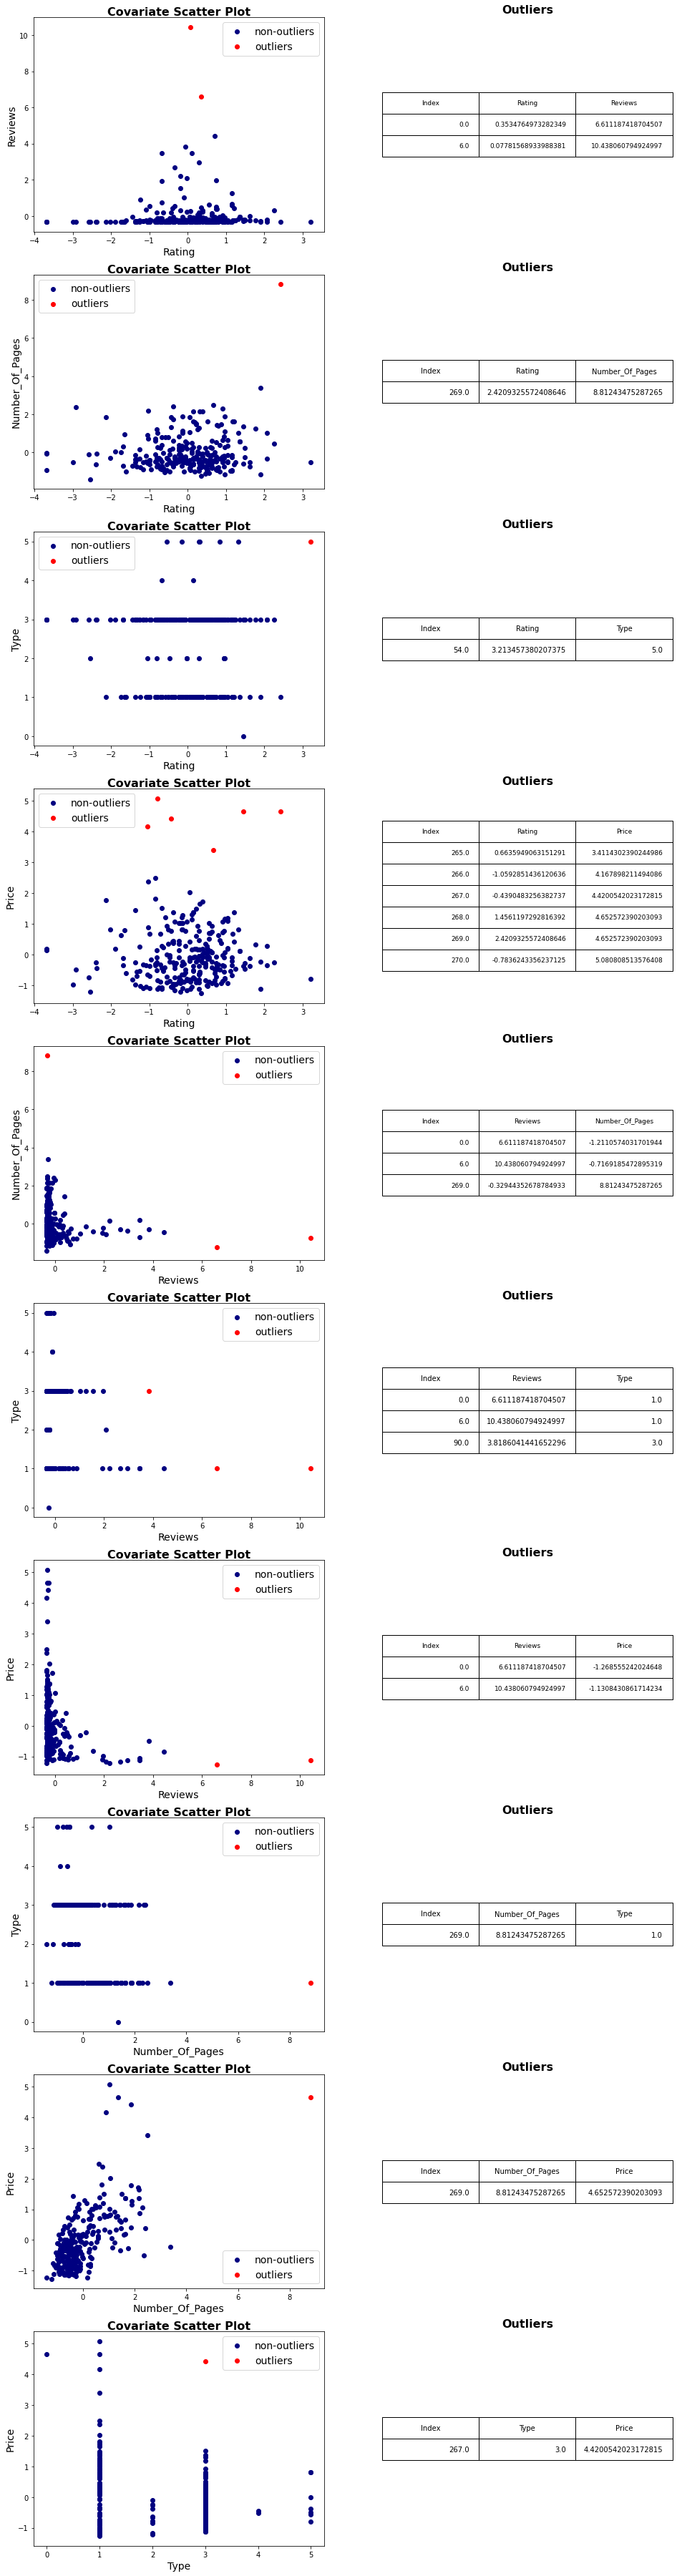

In [235]:
import numpy as np
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D


combs = combinations(book_df.columns, 2)
fig, ax = plt.subplots(10, 2, figsize = (16, 65))

for i, comb in enumerate(combs):
    clusters = DBSCAN(eps = 1.5, min_samples = 5).fit_predict(book_df[list(comb)])
    
    non_outliers = book_df[clusters != -1][list(comb)]
    ax[i, 0].scatter(non_outliers[comb[0]], non_outliers[comb[1]], c = "navy", 
                     label = "non-outliers", alpha = 1)
    
    outliers = book_df[clusters == -1][list(comb)]
    ax[i, 0].scatter(outliers[comb[0]], outliers[comb[1]], c = "red", 
                     label = "outliers", alpha = 1)
    
    format_plot(ax[i, 0], xlab = comb[0], ylab = comb[1], legend = True, title = "Covariate Scatter Plot")
    
    ax[i, 1].axis('off')
    ax[i, 1].set_title("Outliers",  fontsize = 16, fontweight = "bold")
    
    outliers.insert(0, 'Index', outliers.index.values.reshape(-1, 1))
    table = ax[i, 1].table(cellText = outliers.values, colLabels = outliers.columns, loc = 'center')
    table.scale(1, 2.5)
    
plt.show()

Your second task is to look for all combinations of three variables in the above dataset to identify multivariate outliers. The output should again be all the DBSCAN plots(3D) and the outlier data row for all combinations.


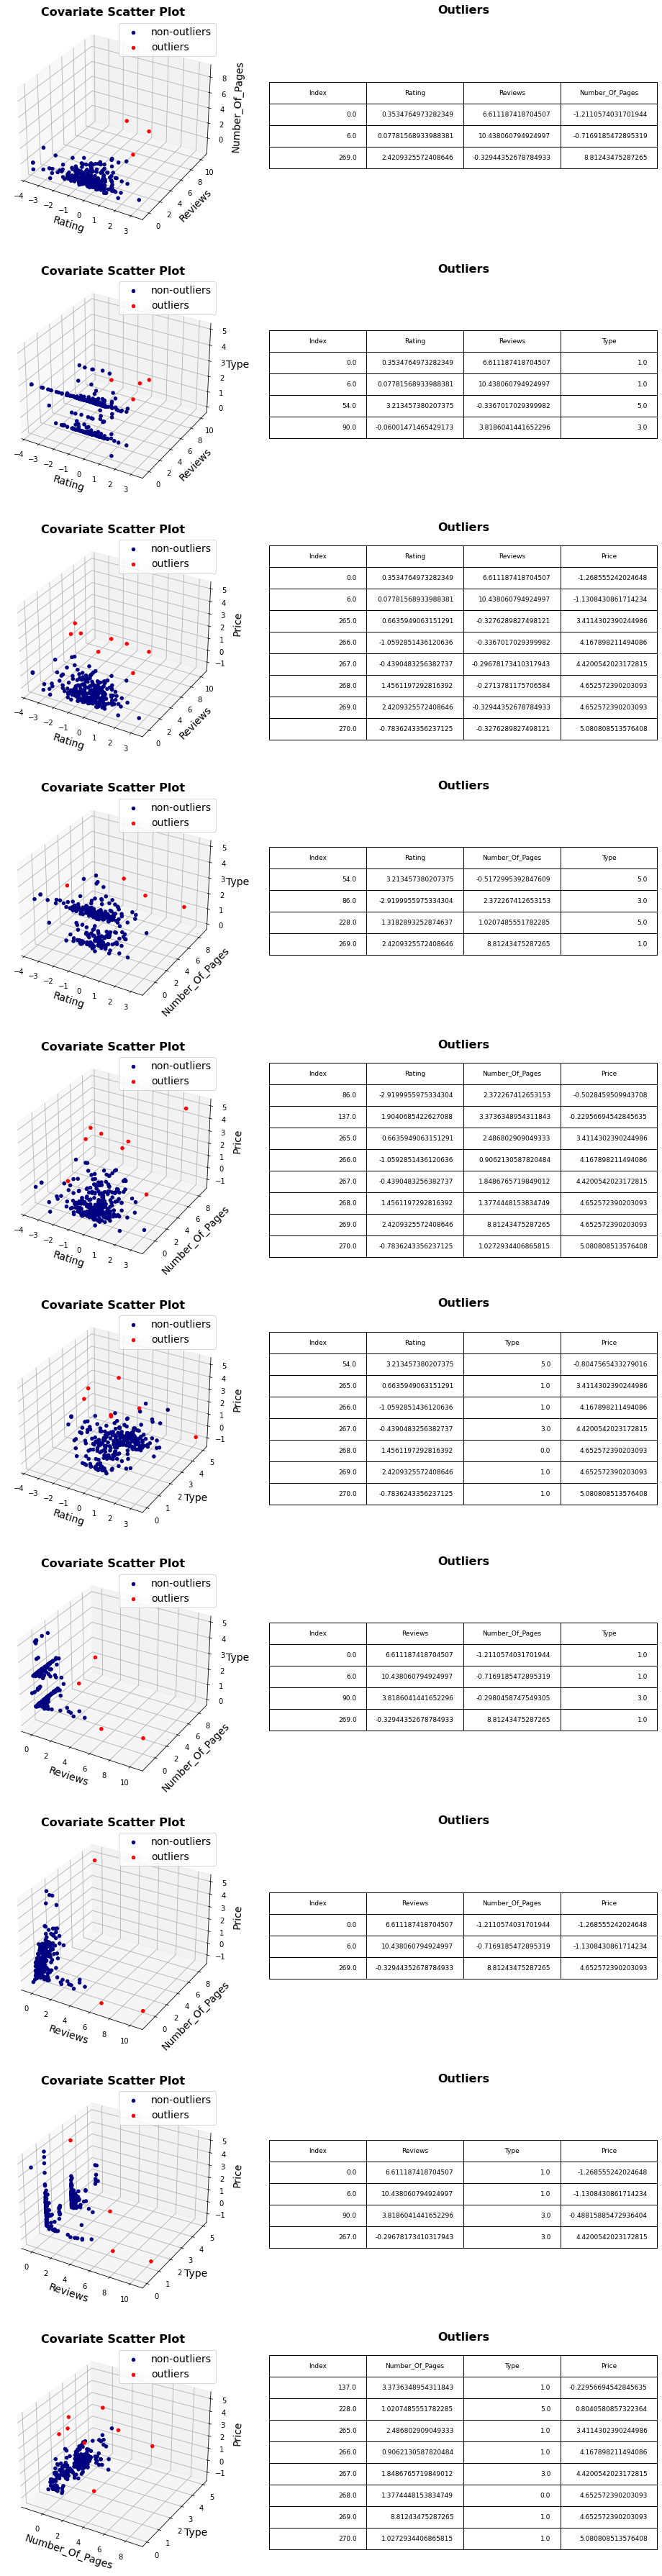

In [233]:
import numpy as np
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D

combs = combinations(book_df.columns, 3)

fig, ax = plt.subplots(10, 2, figsize = (16, 65), subplot_kw = {'projection': '3d'})

for i, comb in enumerate(combs):
    clusters = DBSCAN(eps = 1.5, min_samples = 5).fit_predict(book_df[list(comb)])
    
    non_outliers = book_df[clusters != -1][list(comb)]
    ax[i, 0].scatter(non_outliers[comb[0]], non_outliers[comb[1]], non_outliers[comb[2]], 
                     c = "navy", label = "non-outliers", alpha = 1)
        
    outliers = book_df[clusters == -1][list(comb)]
    ax[i, 0].scatter(outliers[comb[0]], outliers[comb[1]], outliers[comb[2]],
                     c = "red", label = "outliers", alpha = 1)
    
    format_plot(ax[i, 0], xlab = comb[0], ylab = comb[1], zlab = comb[2], 
                title = "Covariate Scatter Plot", legend = True)
    
    ax[i, 1].axis('off')
    ax[i, 1].set_title("Outliers",  fontsize = 16, fontweight = "bold")
    
    outliers.insert(0, 'Index', outliers.index.values.reshape(-1, 1))
    table = ax[i, 1].table(cellText = outliers.values, colLabels = outliers.columns, loc = 'center')
    table.scale(1.8, 2.5)
    
plt.show()